In [4]:
import subprocess
import shlex
import json
import pandas as pd
from glob import glob
from tqdm import tqdm_notebook as tqdm
import uuid
import os
import cv2

In [2]:
folder_path = 'data/photos/'
photos = os.listdir(folder_path)[:]
photo_ids = set([i.split('_')[0] for i in photos])
photo_ids

{'955',
 '1202',
 '1238',
 '428',
 '1449',
 '867',
 '242',
 '23',
 '81',
 '800',
 '803',
 '825',
 '1334',
 '70',
 '1323',
 '1015',
 '1430',
 '3659',
 '1399',
 '294',
 '1413',
 '827',
 '693',
 '387',
 '3427',
 '942',
 '514',
 '549',
 '702',
 '1418',
 '809',
 '515',
 '1372',
 '369',
 '1219',
 '113',
 '814',
 '225',
 '150',
 '1285',
 '1029',
 '1325',
 '276',
 '697',
 '978',
 '466',
 '44',
 '1279',
 '1131',
 '1310',
 '962',
 '450',
 '55',
 '1163',
 '161',
 '1427',
 '157',
 '442',
 '381',
 '736',
 '652',
 '3434',
 '167',
 '1371',
 '954',
 '870',
 '1192',
 '682',
 '1145',
 '121',
 '1273',
 '1292',
 '1063',
 '1333',
 '824',
 '952',
 '338',
 '464',
 '1076',
 '1201',
 '1057',
 '712',
 '862',
 '3623',
 '932',
 '1221',
 '706',
 '3640',
 '1150',
 '176',
 '1294',
 '377',
 '1085',
 '497',
 '759',
 '149',
 '495',
 '816',
 '993',
 '1217',
 '1061',
 '1149',
 '572',
 '1207',
 '1485',
 '771',
 '1354',
 '1479',
 '945',
 '525',
 '852',
 '463',
 '782',
 '130',
 '1141',
 '184',
 '370',
 '424',
 '1166',
 '136

In [3]:
# Reformat all files to .jpg
# for i in tqdm(glob('data/photos/*')):
#     try:
#         img = cv2.imread(i)
#         img.shape
#         os.remove(i)
#         new_name = i.split('.')[0]+'.jpg'
#         cv2.imwrite(new_name, img)
#     except:
#         print(i)

In [17]:
folder_path = 'data/photos/*'
photos = glob(folder_path)

merlin_feature_keys = ['Асимметрия челюсти', 'Высота бровей', 'Наклон глаз', 'Полнота верхней губы', 'Полнота нижней губы', 'Асимметрия размера глаз', 'Ширина посадки глаз', 'Скулы', 'Форма головы', 'Верхнее веко', 'Асимметрия брови', 'Наклон бровей', 'Размер рта', 'Асимметрия наклона глаз', 'Асимметрия носа', 'Размер глаз', 'Оттопыренность ушей', 'Ширина челюсти', 'Уголки рта', 'Форма бровей']

merlin_feature_cat_keys = [i + ' cat' for i in merlin_feature_keys] 
df = pd.DataFrame(columns=merlin_feature_keys + merlin_feature_cat_keys +
                  ['anfas_bbox', 'anfas_roll', 'anfas_pitch', 'anfas_yaw', 'anfas_keypoints'])

# for col in ['anfas_bbox', 'anfas_keypoints']:
#     df[col] = df[col].astype('object')

df

Empty DataFrame
Columns: [Асимметрия челюсти, Высота бровей, Наклон глаз, Полнота верхней губы, Полнота нижней губы, Асимметрия размера глаз, Ширина посадки глаз, Скулы, Форма головы, Верхнее веко, Асимметрия брови, Наклон бровей, Размер рта, Асимметрия наклона глаз, Асимметрия носа, Размер глаз, Оттопыренность ушей, Ширина челюсти, Уголки рта, Форма бровей, Асимметрия челюсти cat, Высота бровей cat, Наклон глаз cat, Полнота верхней губы cat, Полнота нижней губы cat, Асимметрия размера глаз cat, Ширина посадки глаз cat, Скулы cat, Форма головы cat, Верхнее веко cat, Асимметрия брови cat, Наклон бровей cat, Размер рта cat, Асимметрия наклона глаз cat, Асимметрия носа cat, Размер глаз cat, Оттопыренность ушей cat, Ширина челюсти cat, Уголки рта cat, Форма бровей cat, anfas_bbox, anfas_roll, anfas_pitch, anfas_yaw, anfas_keypoints]
Index: []

[0 rows x 45 columns]

In [18]:
for i in range(4000):
    photos = {}
    anfas_path = f'data/photos/{i}_anfas.jpg'
    
    if os.path.exists(anfas_path):
        df.loc[i, 'anfas_path'] = anfas_path
        
        
df    

Асимметрия челюсти Высота бровей Наклон глаз Полнота верхней губы  \
1                   NaN           NaN         NaN                  NaN   
2                   NaN           NaN         NaN                  NaN   
3                   NaN           NaN         NaN                  NaN   
4                   NaN           NaN         NaN                  NaN   
5                   NaN           NaN         NaN                  NaN   
...                 ...           ...         ...                  ...   
3656                NaN           NaN         NaN                  NaN   
3659                NaN           NaN         NaN                  NaN   
3660                NaN           NaN         NaN                  NaN   
3662                NaN           NaN         NaN                  NaN   
3663                NaN           NaN         NaN                  NaN   

     Полнота нижней губы Асимметрия размера глаз Ширина посадки глаз Скулы  \
1                    NaN                     NaN                 NaN   NaN   
2                    NaN                     NaN                 NaN   NaN   
3                    NaN                     NaN                 NaN   NaN   
4                    NaN                     NaN                 NaN   NaN   
5                    NaN                     NaN                 NaN   NaN   
...                  ...                     ...                 ...   ...   
3656                 NaN                     NaN                 NaN   NaN   
3659                 NaN                     NaN                 NaN   NaN   
3660                 NaN                     NaN                 NaN   NaN   
3662                 NaN                     NaN                 NaN   NaN   
3663                 NaN                     NaN                 NaN   NaN   

     Форма головы Верхнее веко  ... Оттопыренность ушей cat  \
1             NaN          NaN  ...                     NaN   
2             NaN          NaN  ...                     NaN   
3             NaN          NaN  ...                     NaN   
4             NaN          NaN  ...                     NaN   
5             NaN          NaN  ...                     NaN   
...           ...          ...  ...                     ...   
3656          NaN          NaN  ...                     NaN   
3659          NaN          NaN  ...                     NaN   
3660          NaN          NaN  ...                     NaN   
3662          NaN          NaN  ...                     NaN   
3663          NaN          NaN  ...                     NaN   

     Ширина челюсти cat Уголки рта cat Форма бровей cat anfas_bbox anfas_roll  \
1                   NaN            NaN              NaN        NaN        NaN   
2                   NaN            NaN              NaN        NaN        NaN   
3                   NaN            NaN              NaN        NaN        NaN   
4                   NaN            NaN              NaN        NaN        NaN   
5                   NaN            NaN              NaN        NaN        NaN   
...                 ...            ...              ...        ...        ...   
3656                NaN            NaN              NaN        NaN        NaN   
3659                NaN            NaN              NaN        NaN        NaN   
3660                NaN            NaN              NaN        NaN        NaN   
3662                NaN            NaN              NaN        NaN        NaN   
3663                NaN            NaN              NaN        NaN        NaN   

     anfas_pitch anfas_yaw anfas_keypoints                  anfas_path  
1            NaN       NaN             NaN     data/photos/1_anfas.jpg  
2            NaN       NaN             NaN     data/photos/2_anfas.jpg  
3            NaN       NaN             NaN     data/photos/3_anfas.jpg  
4            NaN       NaN             NaN     data/photos/4_anfas.jpg  
5            NaN       NaN             NaN     data/photos/5_anfas.jpg  
...        

In [19]:
def parse_new_merlin_features(response):
    anfas_json = {}
    if len(response['anfas_glazomer']) > 0:
        for feature_item in response['anfas_glazomer']['feature_values'].items():
            key = feature_item[0]
            value = feature_item[1]
            anfas_json[key] = value
            
    return anfas_json

def parse_new_merlin_features_cat(response):
    anfas_json = {}
    if len(response['anfas_glazomer']) > 0:
        for feature_item in response['anfas_glazomer']['feature_cat'].items():
            key = feature_item[0]
            value = feature_item[1]
            anfas_json[f'{key} cat'] = value
            
    return anfas_json
        
        
with open('/home/nikolay/workspace/Merlin/merlin/supl/api_feature.json') as f:
    features = json.load(f)
features

[{'id': '72',
  'name': 'Профиль',
  'values': {'240': 'Иррац', '241': 'Средний', '239': 'Рац'}},
 {'id': '71',
  'name': 'Затылок',
  'values': {'238': 'Скошен', '250': 'Средний', '237': 'Выражен'}},
 {'id': '57',
  'name': 'Шея',
  'values': {'206': 'Короткая', '207': 'Средняя', '208': 'Длинная'}},
 {'id': '53',
  'name': 'Доминирующая зона лица ',
  'values': {'195': 'Нижняя',
   '196': 'Средняя',
   '197': 'Верхняя',
   '247': 'Равнозначные',
   '297': 'Верхняя и нижняя',
   '298': 'Верхняя и средняя',
   '299': 'Средняя и нижняя'}},
 {'id': '51',
  'name': 'Форма головы',
  'values': {'181': 'Брахицефал', '182': 'Мезоцефал', '183': 'Долихоцефал'}},
 {'id': '40',
  'name': 'Линия волос',
  'values': {'144': 'Ментально-оценочная',
   '145': 'Ментально-системная',
   '146': 'Телесно-оценочная',
   '147': 'Телесно-системная'}},
 {'id': '38',
  'name': 'Зоны лба',
  'values': {'135': 'Центр', '136': 'Не выражены', '137': 'Периферия'}},
 {'id': '37',
  'name': 'Скос лба',
  'values': {'

In [23]:
for ind in tqdm(df.index[:]):
    anfas_path = df.loc[ind, 'anfas_path']

    
    # VALIDATE
    if anfas_path != None:
        validateCurl = f'''curl -X POST "http://127.0.0.1:8000/validate?image_type=anfas" -H  "accept: application/json" -H  "Content-Type: multipart/form-data" 
                           -F "image_file=@{anfas_path};type=image/jpeg"'''
        args = shlex.split(validateCurl)
        stdout, stderr = subprocess.Popen(args, shell=False, stdout=subprocess.PIPE, stderr=subprocess.PIPE).communicate()
        anfas_response = json.loads(stdout.decode("UTF-8"))
        
        # Check if anfas was found
        if len(anfas_response) == 1: continue
            
        anfas_bbox = list(anfas_response['bbox'].values())
        anfas_keypoints = list(anfas_response['keypoints'].values())
        head_pose = anfas_response['head_pose']
        
        df.loc[ind, ['anfas_bbox', 'anfas_roll', 'anfas_pitch', 'anfas_yaw', 'anfas_keypoints']] = \
            anfas_bbox, head_pose['roll'], head_pose['pitch'], head_pose['yaw'], anfas_keypoints
        
        anfas_photo_present = True
    else: anfas_photo_present = False
        
    # INSERT
    if anfas_photo_present:
        insertCurl = f'''curl -X POST "http://127.0.0.1:8000/insert_photos?\
person_uuid=12345678-1234-5678-1234-56781234{ind:04d}&force_insert=true\
&service_id=etalon\
&person_name={ind}" -H  "accept: application/json" -H  "Content-Type: multipart/form-data" 
-F "anfas_file=@{anfas_path};type=image/jpeg" 
-F "anfas_bbox={anfas_bbox}" 
-F "anfas_keypoints={anfas_keypoints}" 
'''
        args = shlex.split(insertCurl)
        stdout, stderr = subprocess.Popen(args, shell=False, stdout=subprocess.PIPE, stderr=subprocess.PIPE).communicate()
        insert_response = json.loads(stdout.decode("UTF-8"))
        
        
    # GET FEATURES
    getFeaturesCurl = f"""curl -X 'GET' \
  'http://127.0.0.1:8000/get_features?person_uuid=12345678-1234-5678-1234-56781234{ind:04d}&additional=false' \
  -H 'accept: application/json'"""
    args = shlex.split(getFeaturesCurl)
    stdout, stderr = subprocess.Popen(args, shell=False, stdout=subprocess.PIPE, stderr=subprocess.PIPE).communicate()
    get_features_response = json.loads(stdout.decode("UTF-8"))

    anfas_json = parse_new_merlin_features(get_features_response)
    
    anfas_cat_json = parse_new_merlin_features_cat(get_features_response)

    df.loc[ind, pd.Series(anfas_json).index] = pd.Series(anfas_json).values 
    df.loc[ind, pd.Series(anfas_cat_json).index] = pd.Series(anfas_cat_json).values 
        
df

<ipython-input-23-05be2c8e8f5e>:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for ind in tqdm(df.index[:]):


  0%|          | 0/1515 [00:00<?, ?it/s]

/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with diffe

/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with diffe

/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with diffe

/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with diffe

/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with diffe

/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with diffe

/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with diffe

/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with diffe

/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with diffe

/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with diffe

/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with diffe

/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with diffe

/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with diffe

/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with diffe

/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with diffe

/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with diffe

/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with diffe

/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with diffe

/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with diffe

/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with diffe

/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with diffe

/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with diffe

/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with diffe

/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with diffe

/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with diffe

/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with diffe

/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with diffe

/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with diffe

/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with diffe

/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with diffe

/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with diffe

/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with diffe

/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with diffe

/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with diffe

/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with diffe

/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with diffe

/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with diffe

/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with diffe

/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with diffe

/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with diffe

/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with diffe

/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with diffe

/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with diffe

/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with diffe

/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with diffe

/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with diffe

/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with diffe

/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with diffe

/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with diffe

/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with diffe

/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with diffe

/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with diffe

/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with diffe

/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with diffe

/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with diffe

/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with diffe

/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with diffe

/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with diffe

/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with diffe

/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with diffe

/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with diffe

/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with diffe

/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with diffe

/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with diffe

/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with diffe

/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with diffe

/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with diffe

/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/home/nikolay/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with diffe

Асимметрия челюсти Высота бровей Наклон глаз Полнота верхней губы  \
1              3.390337      0.155163   -7.744183             0.728999   
2              0.009935      0.225912   -9.292315             1.778055   
3               0.89146      0.141038  -12.152457             1.414088   
4             -2.407352      0.226568    2.480188              1.53393   
5              0.361198      0.249773    -3.17983             1.625533   
...                 ...           ...         ...                  ...   
3656           1.327879      0.198817   -2.385944             1.415175   
3659          -5.211018      0.236392    2.726311             1.393396   
3660            0.47419      0.190069   -6.709837              1.24821   
3662           2.307039      0.188664   -8.572998             1.092283   
3663          -7.567247      0.180123   -5.804455             1.650615   

     Полнота нижней губы Асимметрия размера глаз Ширина посадки глаз  \
1               5.310254                0.981586            0.720082   
2               5.545871                1.013628            0.817481   
3               6.599077                0.937218            0.739006   
4                7.66965                1.002826            0.859598   
5               5.747126                 1.16487            0.928726   
...                  ...                     ...                 ...   
3656            7.075874                 0.79098            0.791811   
3659            7.376801                1.167989            0.803615   
3660            6.241051                0.900908            0.867235   
3662            5.041305                 0.99628            0.849671   
3663            6.949956                 1.03956            0.854423   

          Скулы Форма головы Верхнее веко  ... Оттопыренность ушей cat  \
1      -1.35369     1.308804     0.349305  ...            Оттопыренные   
2     -6.867299     1.483796     0.820615  ...                Прижатые   
3       -0.0052     1.537365     0.550704  ...                 Средние   
4     -2.441267     1.252503     0.766965  ...                 Средние   
5     -1.762808     1.334151     0.855537  ...                 Средние   
...         ...          ...          ...  ...                     ...   
3656   10.18363     1.344508     0.430224  ...                Прижатые   
3659   1.016116     1.525618     1.016959  ...                 Средние   
3660  16.762554      1.50106     0.398726  ...                 Средние   
3662   14.32272     1.336051     0.439944  ...                 Средние   
3663 -11.302035     1.495149     0.454881  ...            Оттопыренные   

     Ширина челюсти cat Уголки рта cat Форма бровей cat            anfas_bbox  \
1          Средне-узкая          Пряые           Прямые  [102, 132, 298, 375]   
2               Средняя          Вверх           Прямые   [191, 85, 544, 559]   
3          Средне-узкая          Вверх            Серпы   [208, 57, 311, 193]   
4               Средняя           Вниз           Прямые   [196, 58, 327, 228]   
5          Средне-узкая          Пряые         Полукруг   [186, 63, 308, 228]   
...                 ...            ...              ...                   ...   
3656       Средне-узкая          Пряые           Прямые   [161, 57, 287, 226]   
3659            Средняя           Вниз           Прямые   [168, 12, 301, 199]   
3660            Широкая          Пряые           Прямые   [156, 39, 273, 205]   
3662     Средне-широкая          Пряые            Серпы   [167, 39, 289, 203]   
3663       Средне-узкая           Вниз           Прямые   [194, 43, 319, 223]   

     anfas_roll anfas_pitch anfas_yaw  \
1          -9.5        -8.7       9.7   
2          -3.0       -10.7      -9.0   
3          -3.0       -11.7       4.4   
4          -5.8        -3.6      23.4   
5     -3.122562    5.140881  0.091976   
...         ...         ...       ...   
3656       -0.9        -5.0      25.7   
3659       -0.9        -2.1     -20.3   
3660        0.9     

In [24]:
df.to_csv('data/fighters_df.csv')

In [58]:
features = ['Асимметрия челюсти', 'Высота бровей', 'Наклон глаз',
       'Полнота верхней губы', 'Полнота нижней губы',
       'Асимметрия размера глаз', 'Ширина посадки глаз', 'Скулы',
       'Форма головы', 'Верхнее веко', 'Асимметрия брови', 'Наклон бровей',
       'Размер рта', 'Асимметрия наклона глаз', 'Асимметрия носа',
       'Размер глаз', 'Оттопыренность ушей', 'Ширина челюсти', 'Уголки рта']

for feat in features:
    df[feat] = df[feat].astype(float)

In [6]:
fdf = pd.read_csv('data/0.fighters_raw.csv')
fdf

Unnamed: 0  armSpan avgFightTime         city   country dateOfBirth  \
0              0   190.50          NaN   Bonnyville    Canada  1991-08-02   
1              1   190.50          NaN          NaN    Brazil  1989-06-23   
2              2   193.04        11:41  Makhachkala  Dagestan  1981-09-02   
3              3   187.96        15:00       Manaus    Brazil  1992-12-24   
4              4   190.50        13:05        Ikuno     Japan  1975-07-29   
...          ...      ...          ...          ...       ...         ...   
3664        3664      NaN          NaN          NaN       NaN  1991-09-28   
3665        3665      NaN          NaN          NaN       NaN  1987-07-09   
3666        3666      NaN          NaN          NaN       NaN  1994-08-19   
3667        3667      NaN          NaN          NaN       NaN  1990-11-09   
3668        3668      NaN          NaN          NaN       NaN  1988-07-02   

     disciplines  draws  height    id  ...  significantStrikesMissedPerMinute  \
0             []      1  187.96     1  ...                               3.23   
1             []      0  190.50     2  ...                                NaN   
2             []      0  190.50     3  ...                               2.45   
3             []      0  182.88     4  ...                               2.90   
4             []      0  177.80     5  ...                               3.62   
...          ...    ...     ...   ...  ...                                ...   
3664          []      0  182.88  3673  ...                                NaN   
3665          []      0  182.88  3674  ...                                NaN   
3666          []      0  170.18  3675  ...                                NaN   
3667          []      0  175.26  3676  ...                                NaN   
3668          []      0  172.72  3677  ...                                NaN   

      submissionAttemptsPer15minutes  takedownsAccuracy  \
0                                NaN                NaN   
1                                NaN                NaN   
2                                0.2               24.0   
3                                NaN               20.0   
4                                1.0               67.0   
...                              ...                ...   
3664                             NaN                NaN   
3665                             NaN                NaN   
3666                             NaN                NaN   
3667                             NaN                NaN   
3668                             NaN                NaN   

     takedownsDefendPercent  takedownsPer15min           timezone  weight  \
0                     100.0                NaN   America/Edmonton  115.67   
1                       NaN                NaN  America/Sao_Paulo  112.04   
2                      47.0               1.23      Europe/Moscow  106.59   
3                      80.0               0.64     America/Manaus   92.99   
4                      92.0               2.29         Asia/Tokyo   77.11   
...                     ...                ...                ...     ...   
3664                    NaN                NaN                NaN   83.91   
3665                    NaN                NaN                NaN   77.11   
3666                    NaN                NaN                NaN   65.77   
3667                    NaN                NaN                NaN   65.77   
3668                    NaN                NaN                NaN   61.24   

      weightCategory.id weightCategory.name  wins  
0                     9         Тяжелый вес    17  
1                     9         Тяжелый вес     6  
2                     9         Тяжелый вес    20  
3                     8     Полутяжелый вес    15  
4                     6     Полусредний вес    14  
...                 ...                 ...   ...  
3664                 14       Не определена    18  
3665                 14       Не определена    15  
3666  

In [60]:
df[fight_stats] = fdf[fight_stats]

In [61]:
fight_stats = ['wins', 'looses', 'rank', 'sigStrikesAccuracy', 'significantStrikesDefendPercent',
       'significantStrikesLandPerMinute', 'significantStrikesMissedPerMinute',
       'submissionAttemptsPer15minutes', 'takedownsAccuracy',
       'takedownsDefendPercent', 'takedownsPer15min']

fdf[fight_stats]

wins  looses  rank  sigStrikesAccuracy  significantStrikesDefendPercent  \
0       17       6    16                49.0                             63.0   
1        6       0    16                 NaN                              NaN   
2       20       5    16                44.0                             58.0   
3       15       5    16                40.0                             55.0   
4       14       6    16                41.0                             57.0   
...    ...     ...   ...                 ...                              ...   
3664    18       1    16                 NaN                              NaN   
3665    15       4    16                 NaN                              NaN   
3666    11       1    16                 NaN                              NaN   
3667    13       3    16                 NaN                              NaN   
3668    16       7    16                 NaN                              NaN   

      significantStrikesLandPerMinute  significantStrikesMissedPerMinute  \
0                                4.17                               3.23   
1                                 NaN                                NaN   
2                                2.45                               2.45   
3                                2.05                               2.90   
4                                3.10                               3.62   
...                               ...                                ...   
3664                              NaN                                NaN   
3665                              NaN                                NaN   
3666                              NaN                                NaN   
3667                              NaN                                NaN   
3668                              NaN                                NaN   

      submissionAttemptsPer15minutes  takedownsAccuracy  \
0                                NaN                NaN   
1                                NaN                NaN   
2                                0.2               24.0   
3                                NaN               20.0   
4                                1.0               67.0   
...                              ...                ...   
3664                             NaN                NaN   
3665                             NaN                NaN   
3666                             NaN                NaN   
3667                             NaN                NaN   
3668                             NaN                NaN   

      takedownsDefendPercent  takedownsPer15min  
0                      100.0                NaN  
1                        NaN                NaN  
2                       47.0               1.23  
3                       80.0               0.64  
4                       92.0               2.29  
...                      ...                ...  
3664                     NaN                NaN  
3665                     NaN                NaN  
3666                     NaN                NaN  
3667                     NaN                NaN  
3668                     NaN                NaN  

[3669 rows x 11 columns]

In [62]:
df['Ширина челюсти'] = df['Ширина челюсти'].astype(float)

In [63]:
df[['Размер глаз', 'sigStrikesAccuracy']].dropna()

Размер глаз  sigStrikesAccuracy
2        5.088016                44.0
3        5.429823                40.0
4        5.691325                41.0
5        5.025958                50.0
6        5.136880                55.0
...           ...                 ...
1927     5.768056                39.0
1928     5.451296                38.0
1939     5.772966                36.0
1943     5.514199                33.0
3401     5.914523                35.0

[1414 rows x 2 columns]

In [66]:
df.dtypes

Асимметрия челюсти                   float64
Высота бровей                        float64
Наклон глаз                          float64
Полнота верхней губы                 float64
Полнота нижней губы                  float64
Асимметрия размера глаз              float64
Ширина посадки глаз                  float64
Скулы                                float64
Форма головы                         float64
Верхнее веко                         float64
Асимметрия брови                     float64
Наклон бровей                        float64
Размер рта                           float64
Асимметрия наклона глаз              float64
Асимметрия носа                      float64
Размер глаз                          float64
Оттопыренность ушей                  float64
Ширина челюсти                       float64
Уголки рта                           float64
Форма бровей                          object
Асимметрия челюсти cat                object
Высота бровей cat                     object
Наклон гла

<AxesSubplot:>

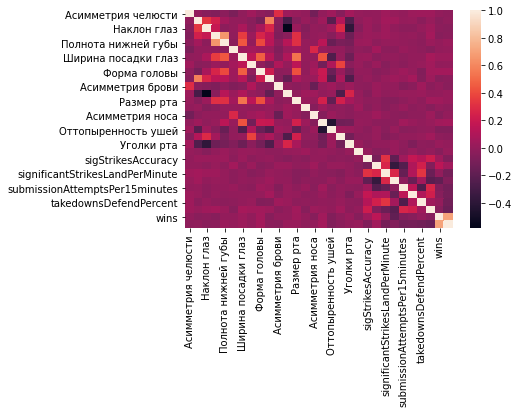

In [68]:
sns.heatmap(df.corr())

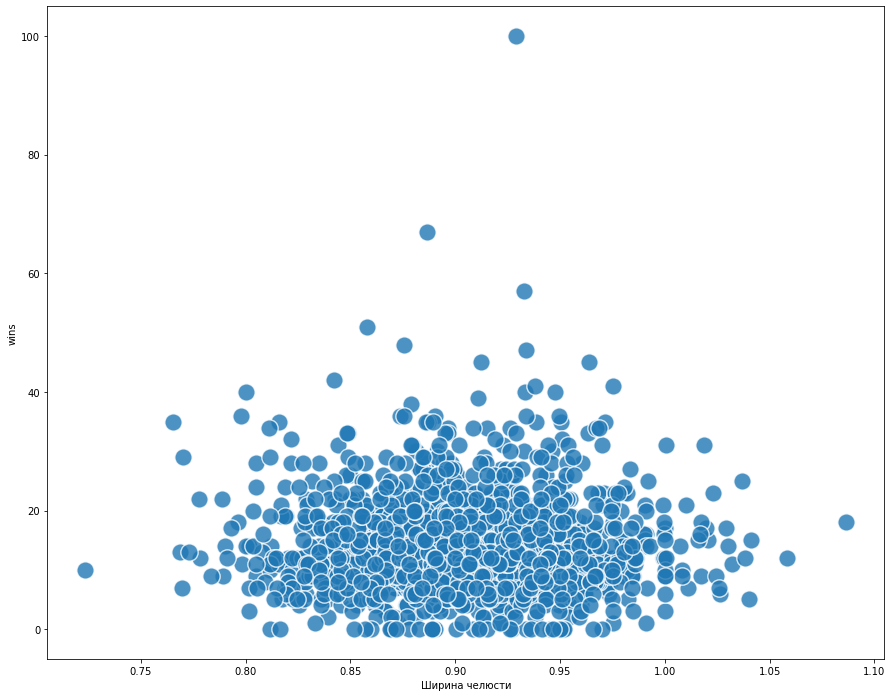

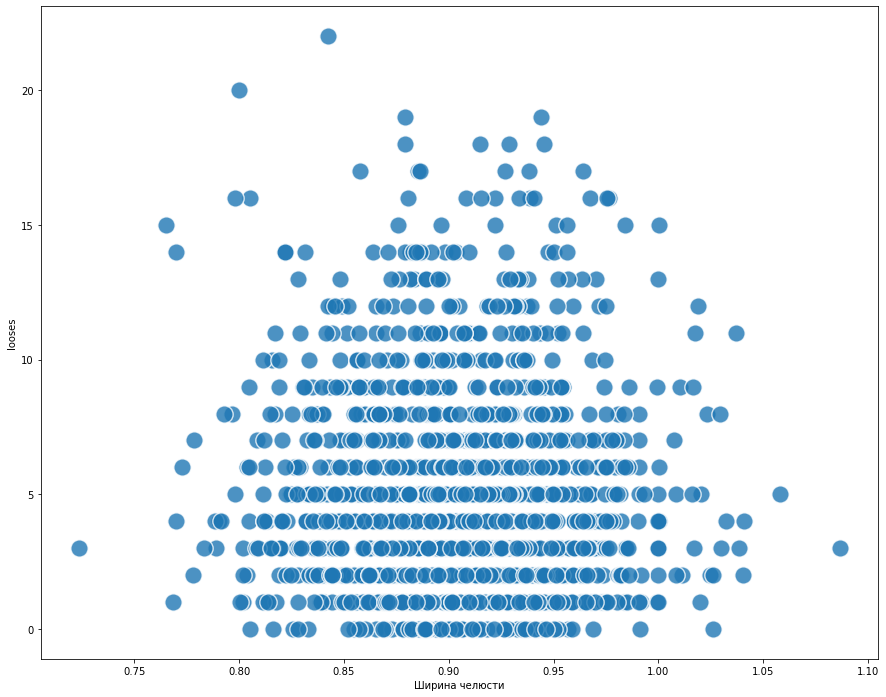

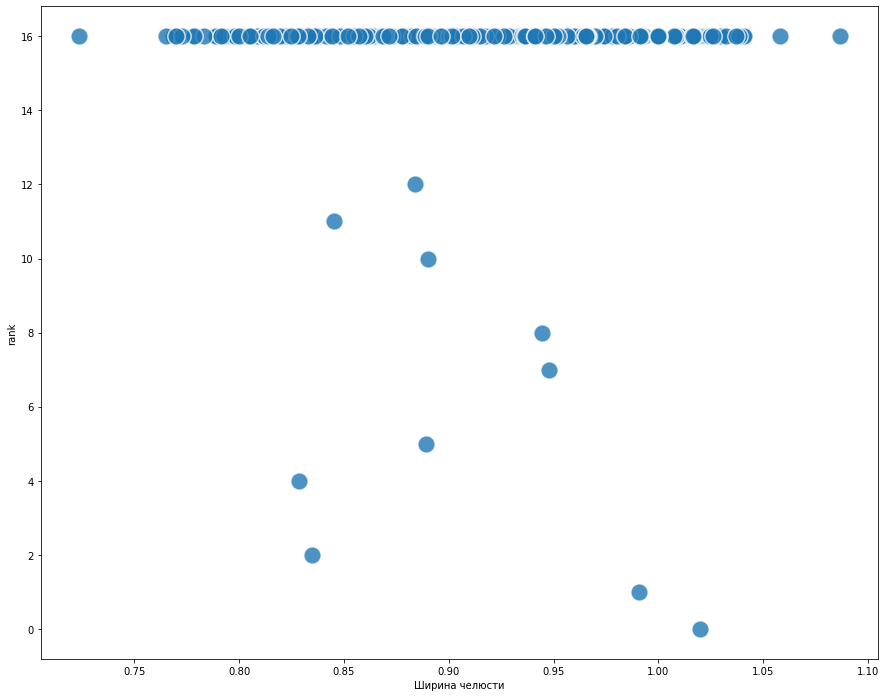

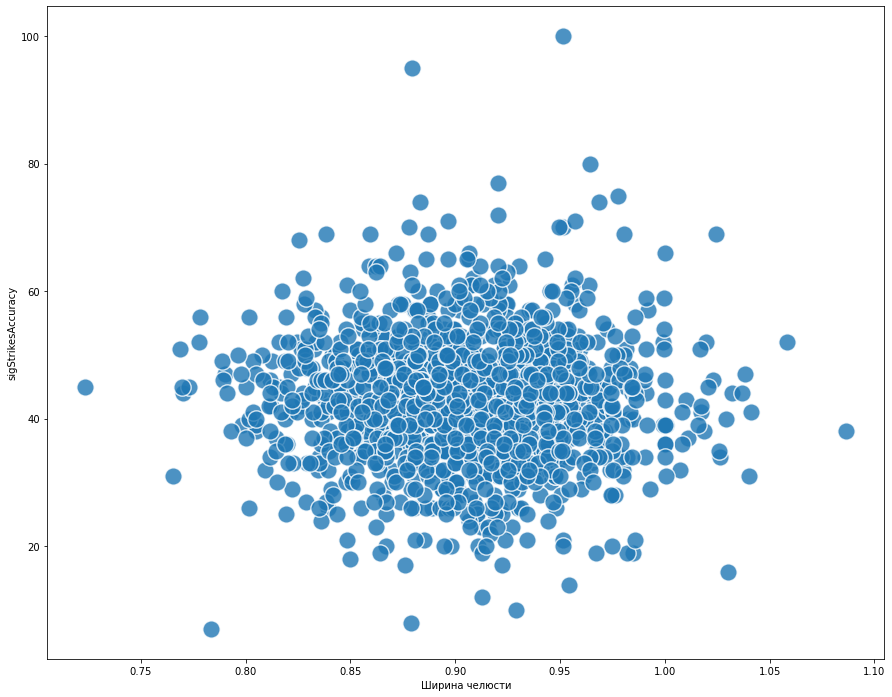

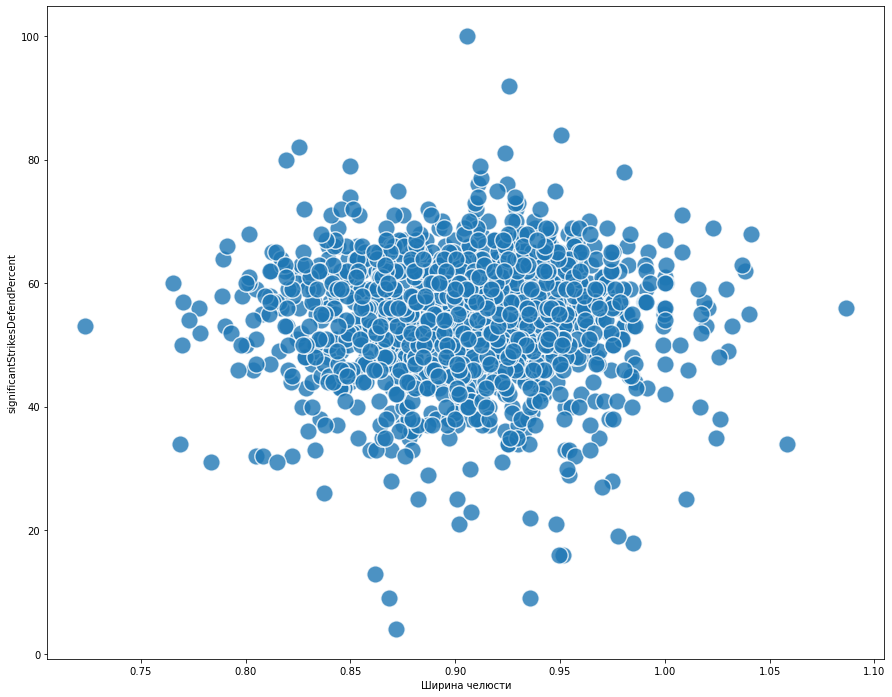

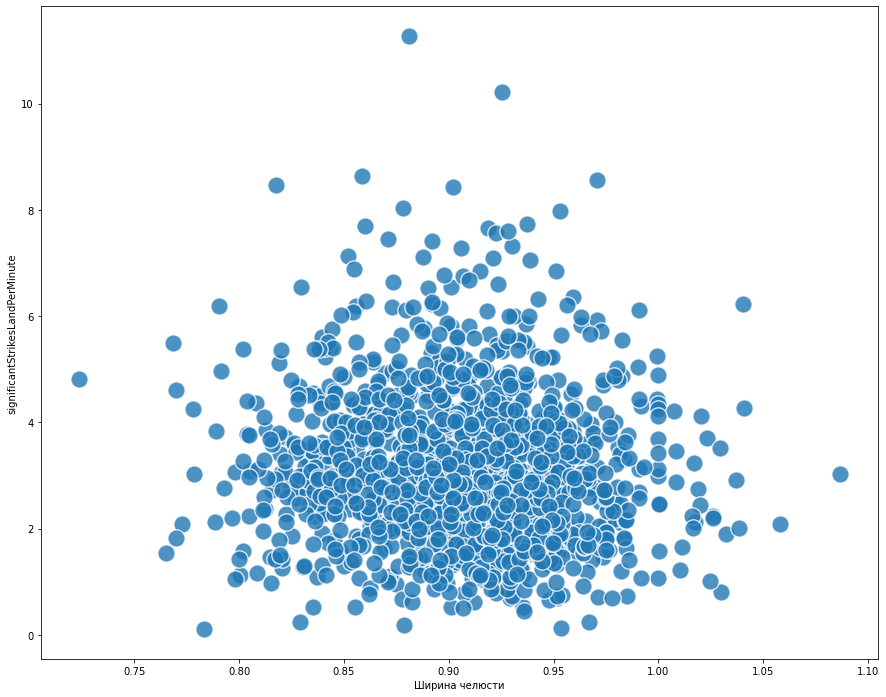

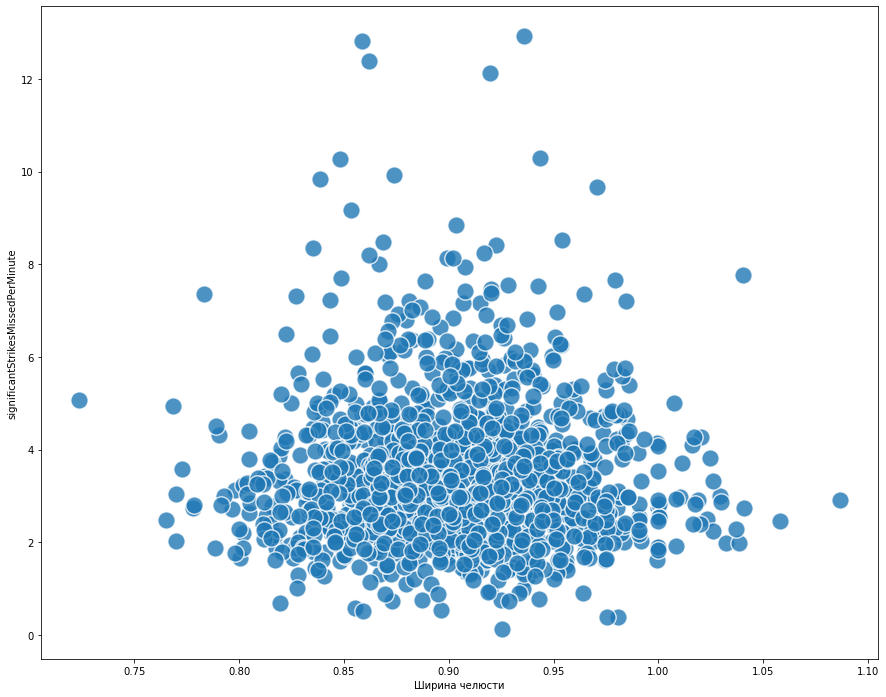

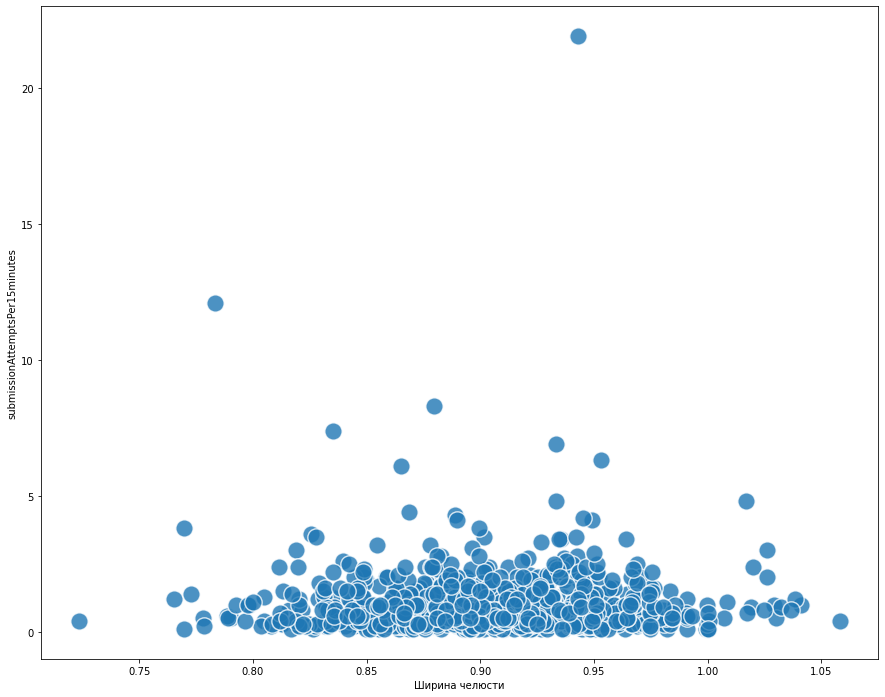

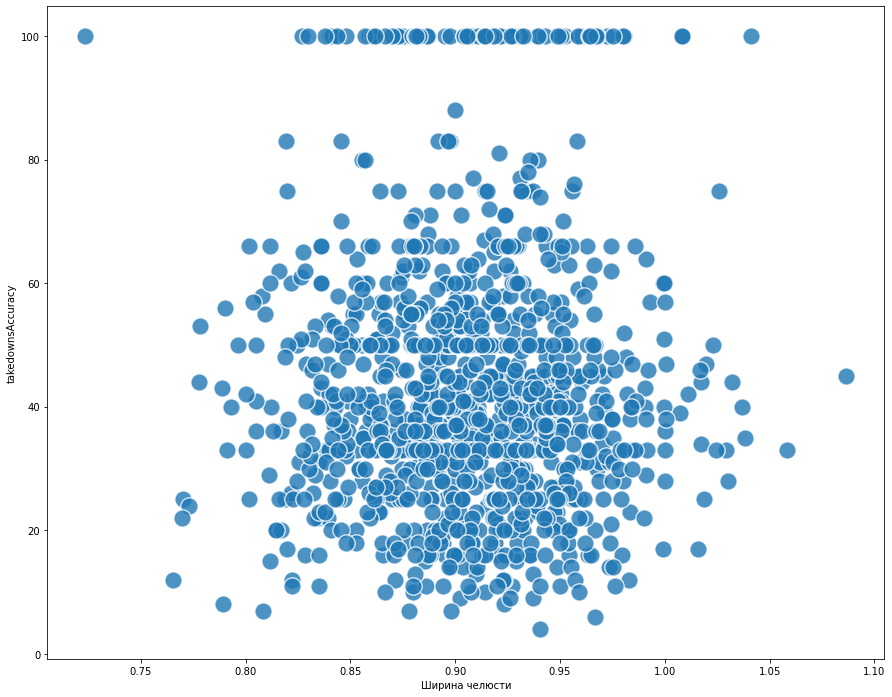

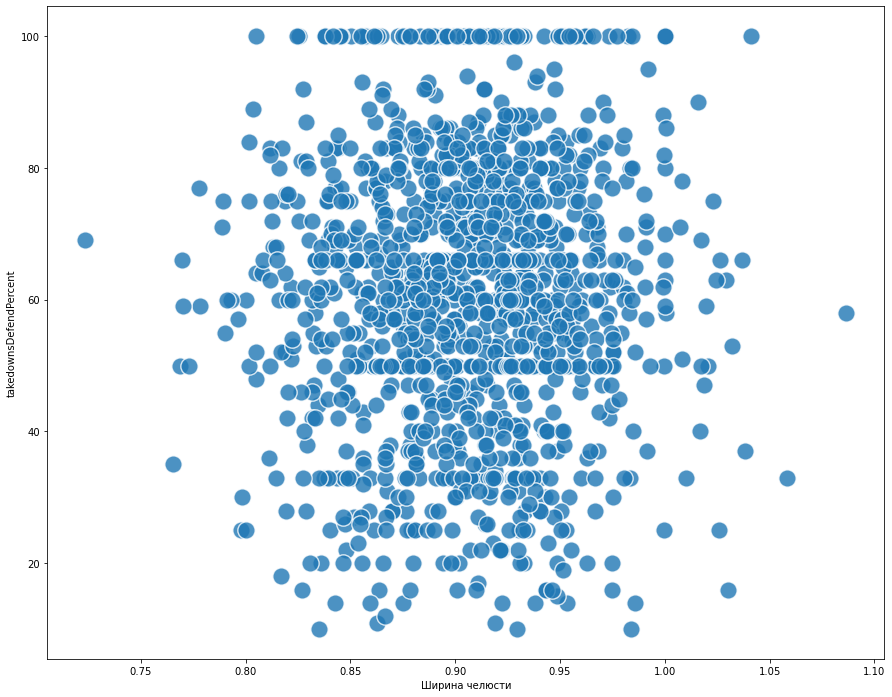

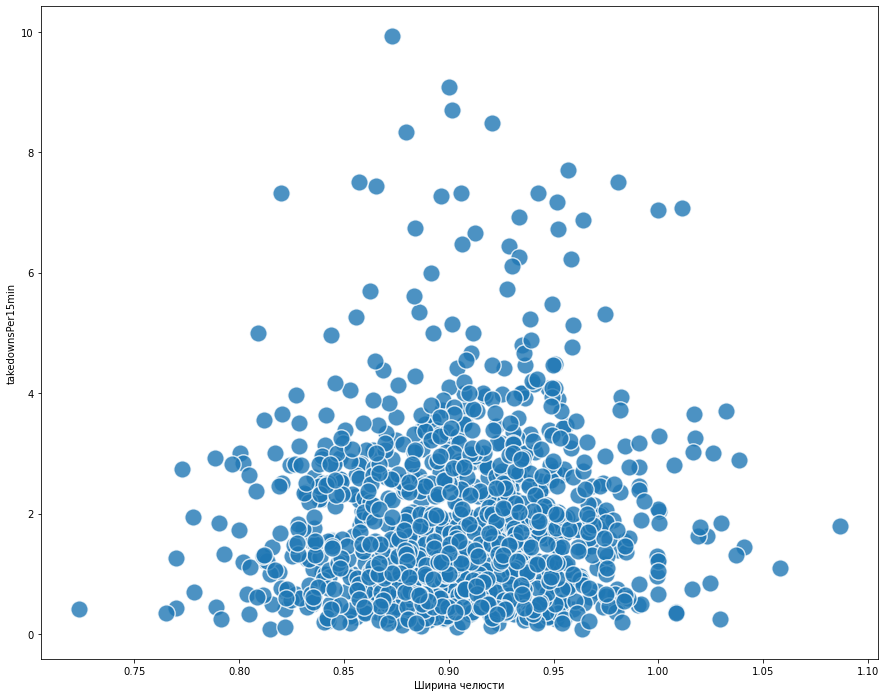

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

for fightstat in fight_stats:
    
    f, ax = plt.subplots(figsize=(15, 12)) 
    g = sns.scatterplot(x = 'Ширина челюсти', y = fightstat,  
                        data = df, s = 300, alpha = 0.8) 

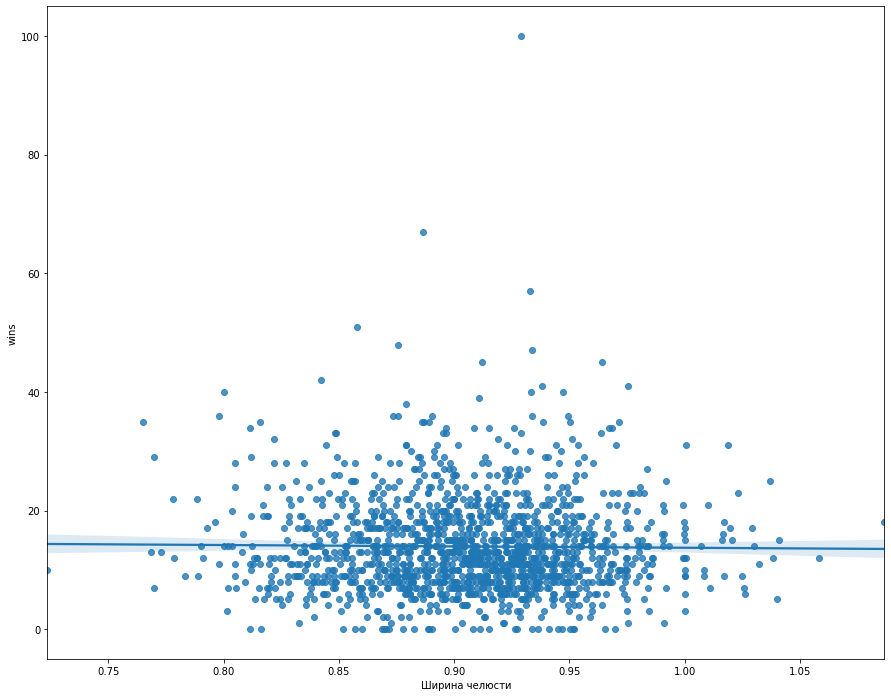

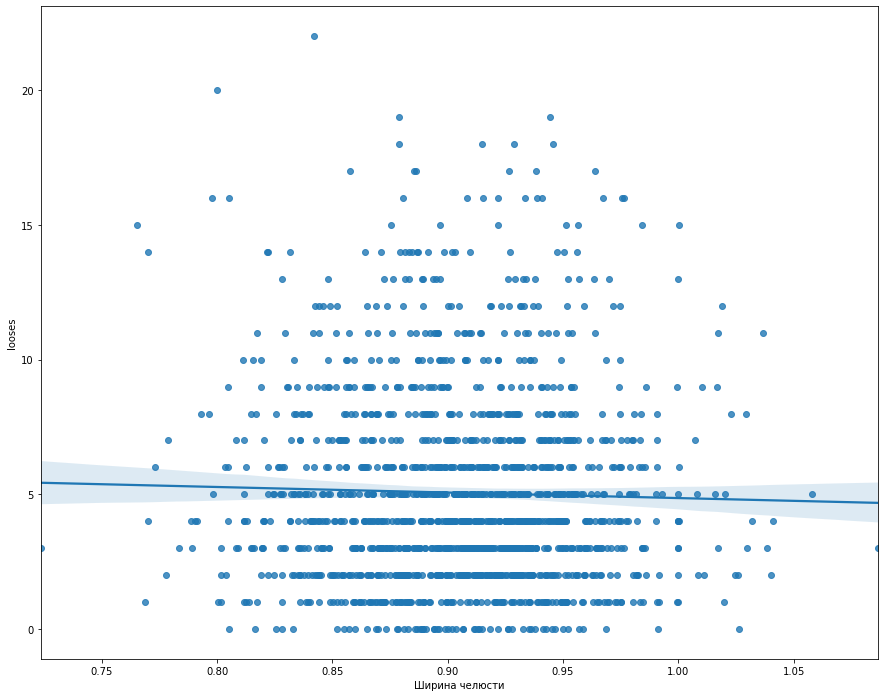

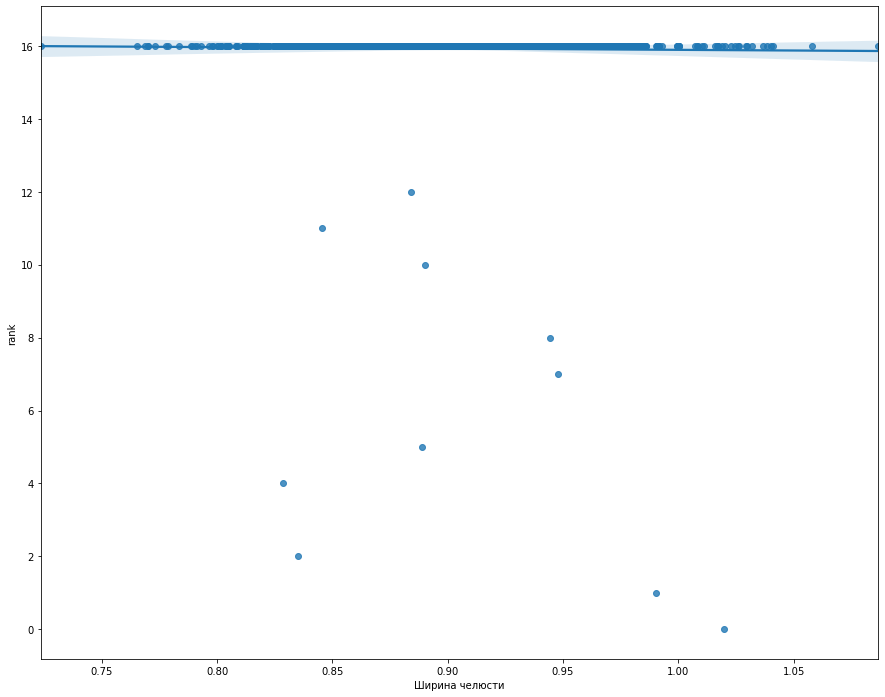

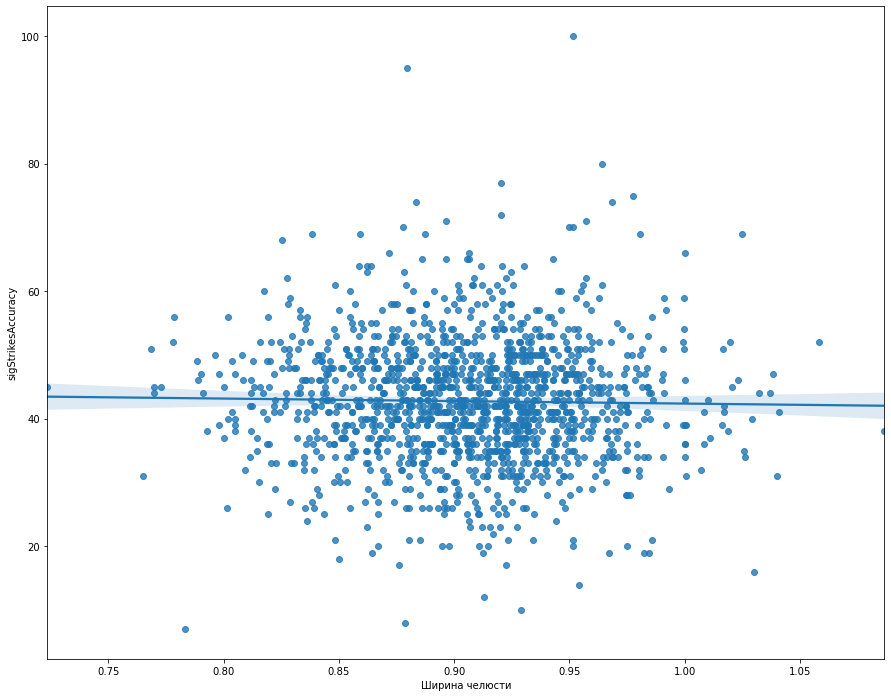

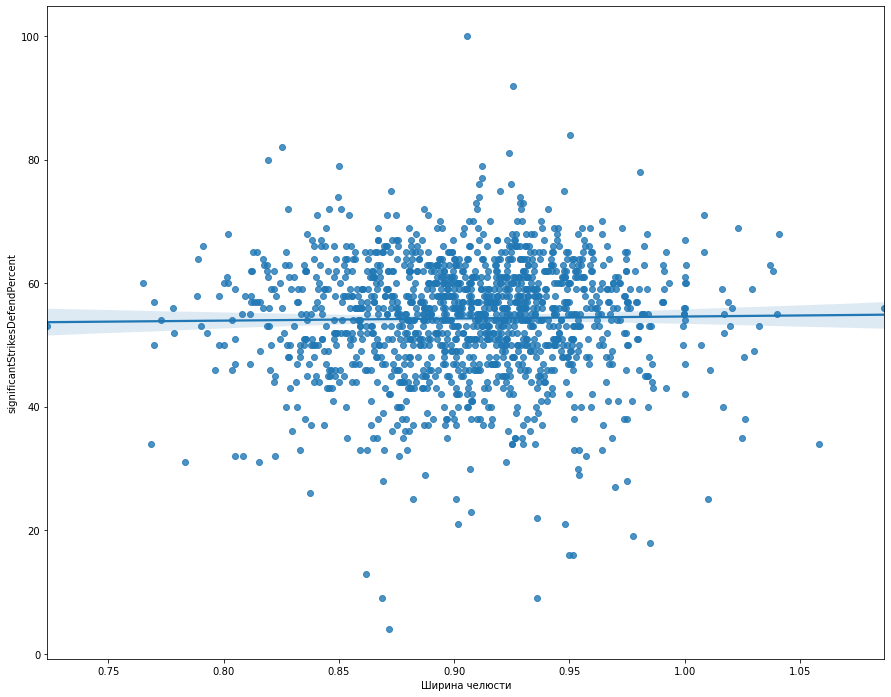

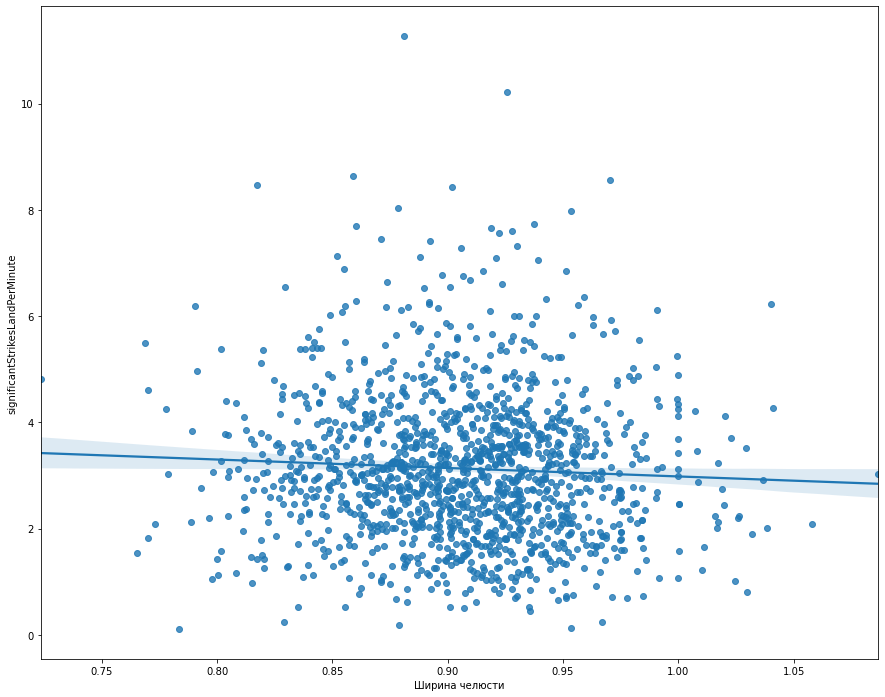

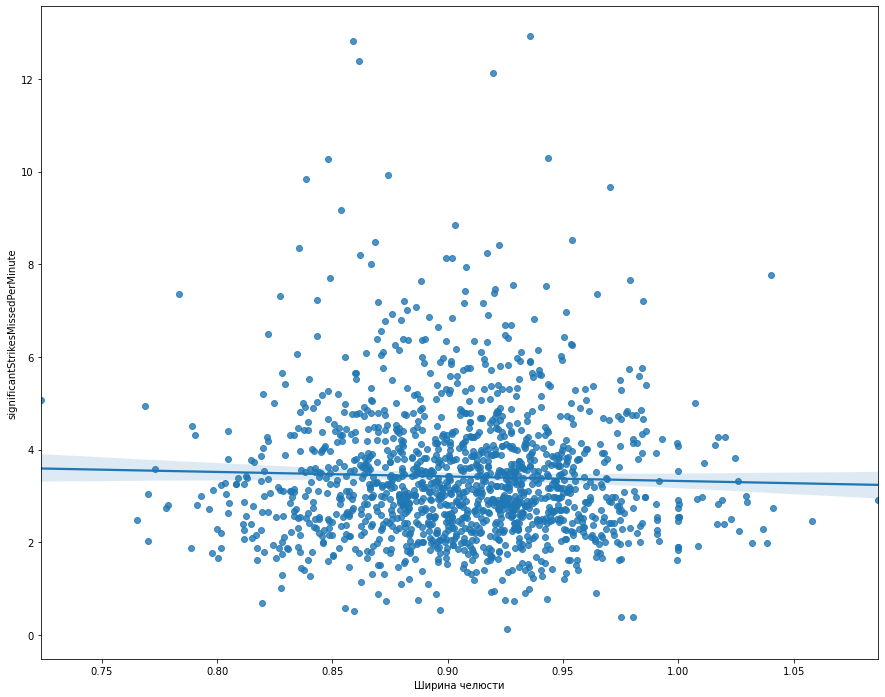

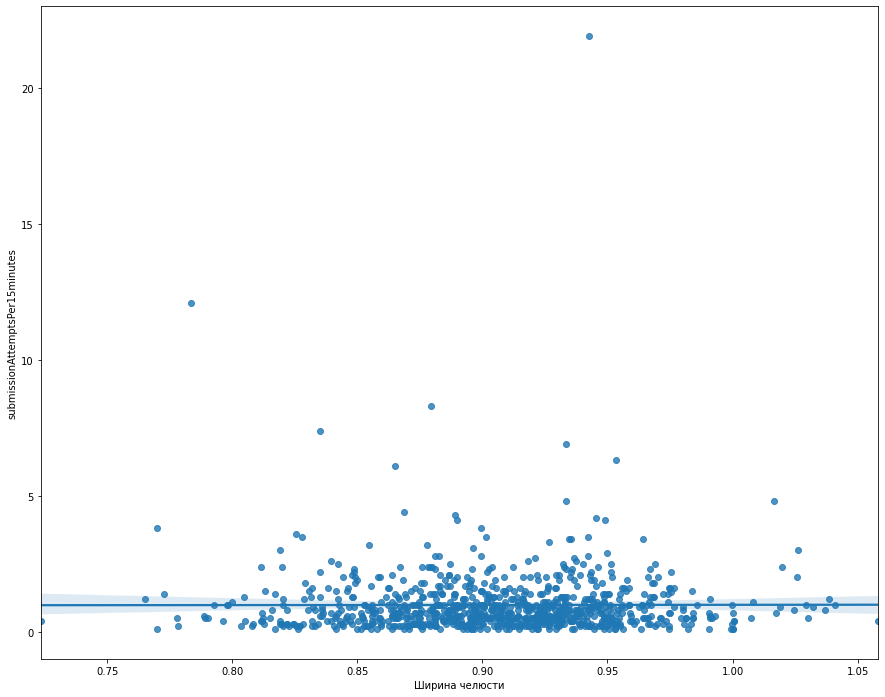

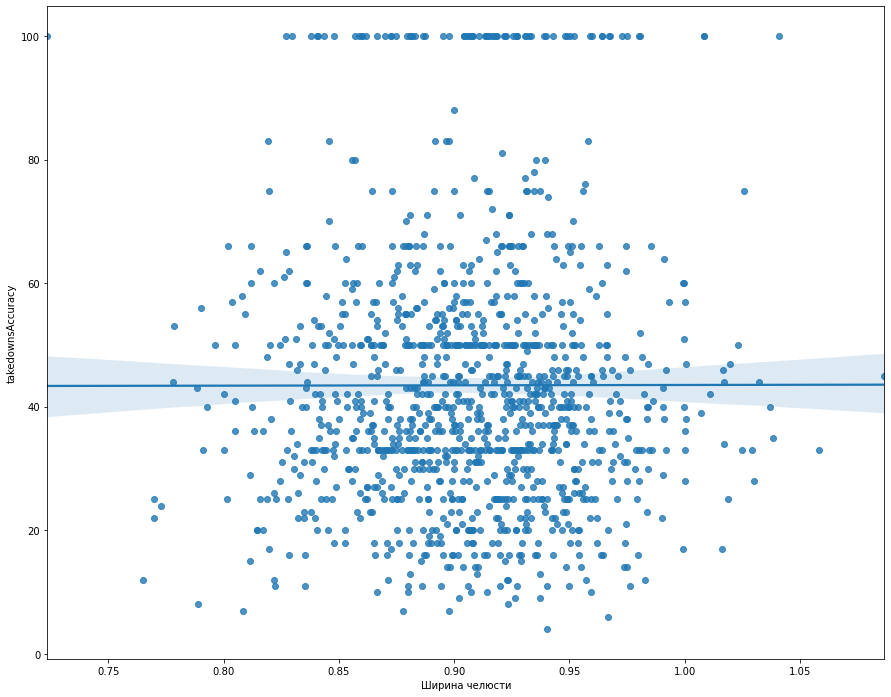

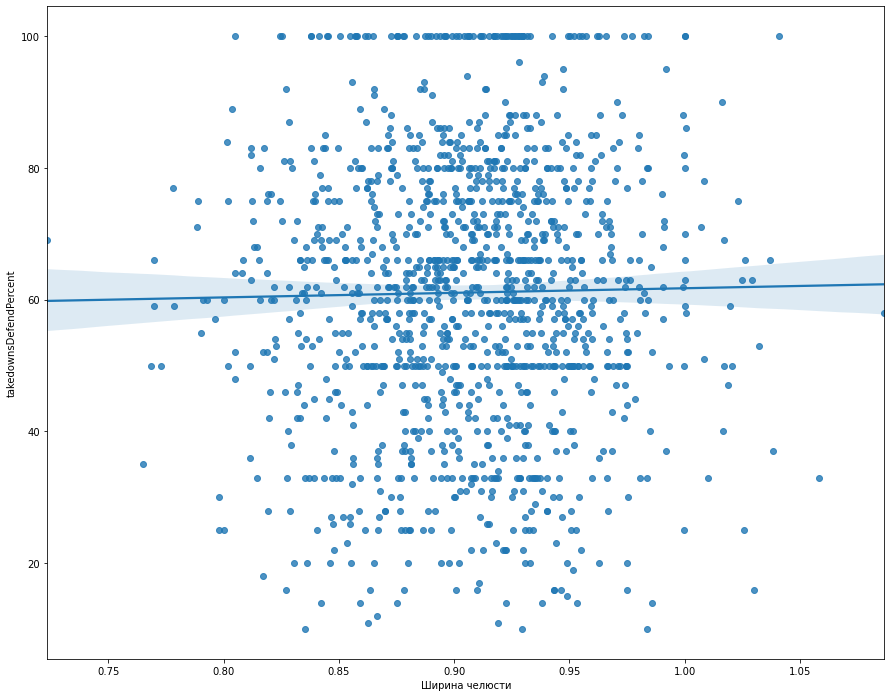

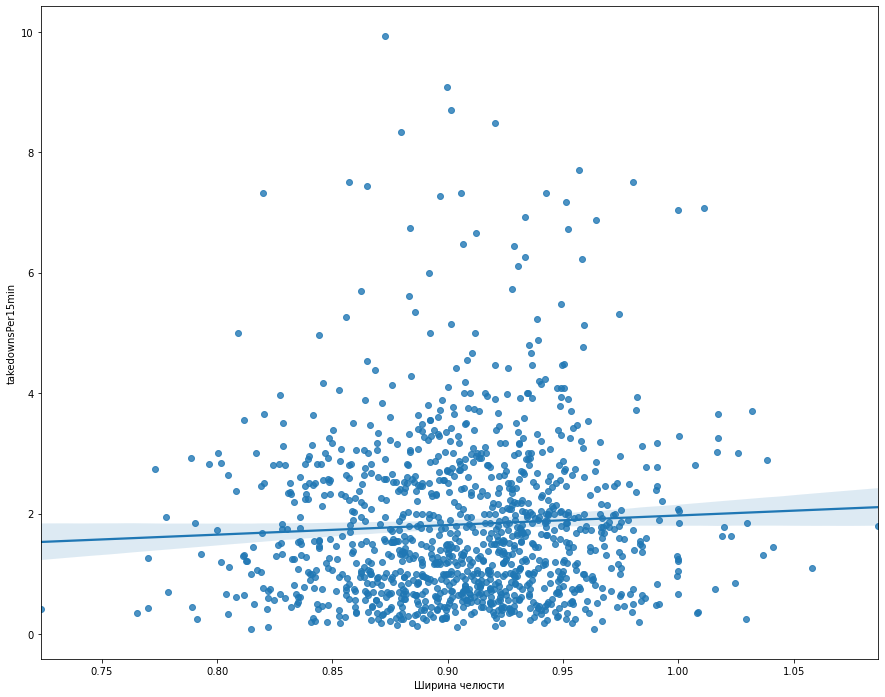

In [49]:
for fightstat in fight_stats:
    
    plt.subplots(figsize=(15, 12)) 

    ax = sns.regplot(x="Ширина челюсти", y=fightstat, data=df)
    plt.show()

In [27]:
df[['Размер глаз', 'sigStrikesAccuracy']].dtypes

Размер глаз            object
sigStrikesAccuracy    float64
dtype: object

In [28]:
df['Размер глаз'] = df['Размер глаз'].astype(float)

array([[<AxesSubplot:title={'center':'Размер глаз'}>,
        <AxesSubplot:title={'center':'sigStrikesAccuracy'}>]],
      dtype=object)

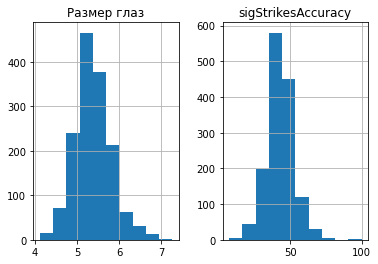

In [32]:
df[['Размер глаз', 'sigStrikesAccuracy']].hist()

In [31]:
import plotly.express as px

px.scatter(df[['Размер глаз', 'sigStrikesAccuracy']])

In [ ]:
df['Размер глаз']

In [19]:
df.to_csv('data/fighters_df.csv')